![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [6]:
# resumen descriptivo complementario
# season
bikes.groupby('season').total.describe()


,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [7]:
# hour
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


### Análisis descriptivo de las variables "season" y "hour"

Variable "season":
- Media: La media de la variable "season" indica que el número de viajes en bicicleta es mayor en las estaciones 2  y 3, con valores de 215.25 y 234.41 viajes por día respectivamente
- Desviación estándar: La desviación estándar es considerablemente alta en todas las estaciones, lo que indica una gran variabilidad en el número de viajes en bicicleta.
- Valores mínimo y máximo: En todas las estaciones se presenta un valor minimo de 1 viaje por día, mientras que la estación 3 registra el maximo de viajes con un valor de 977 viajes por día seguido de la estacion 4 con 948 viajes.
- Cuartiles: Los valores de los cuartiles confirman la mayor cantidad de viajes en la estaciones 3.

Variable "hour":
- Media: La media del número de viajes en bicicleta varía considerablemente a lo largo del día. Las horas con mayor media se observan entre las 16 y las 20 (hora pico), con valores superiores a los 300 viajes por hora.
- Desviación estándar: La desviación estándar también es alta en todas las horas, lo que indica una gran variabilidad en el número de viajes.
- Valores mínimo y máximo: El número mínimo de viajes en bicicleta se observa en las primeras horas de la mañana (alrededor de las 4-5 am), mientras que el máximo se presenta en la hora 17 (5 pm).
- cuartiles: los valores de los cuartiles permiten comprender la distribución del número de viajes en bicicleta a lo largo del día. Sugieren un claro patrón diario en el número de viajes en bicicleta, con un aumento significativo a partir de la media mañana (alrededor de las 10-11 am) hasta la hora pico (entre las 4 y las 11 pm) y una posterior disminución durante la noche y las primeras horas de la mañana.


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

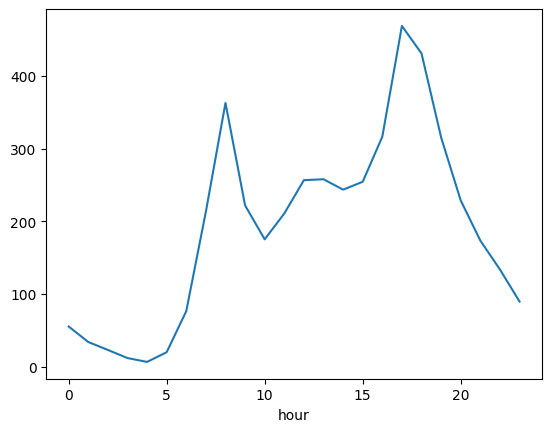

In [8]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

Text(0, 0.5, 'Número de bicicletas')

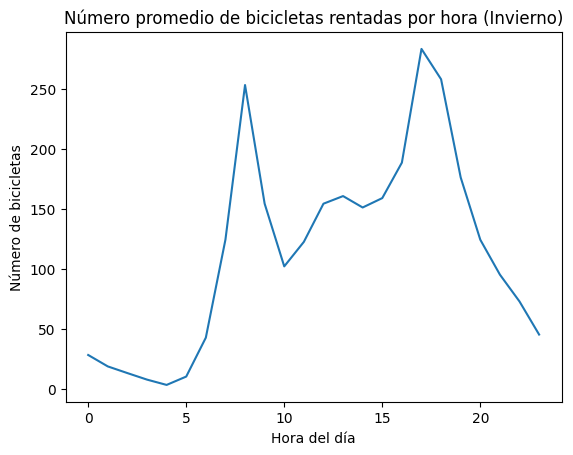

In [9]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 

# Filtrar datos para invierno (season = 1)
winter_data = bikes[bikes['season'] == 1]

# Calcular la media del total de viajes por hora en invierno
winter_data.groupby('hour').total.mean().plot()

# Agregar título y etiquetas a los ejes
plt.title('Número promedio de bicicletas rentadas por hora (Invierno)')
plt.xlabel('Hora del día')
plt.ylabel('Número de bicicletas')

Text(0, 0.5, 'Número de bicicletas')

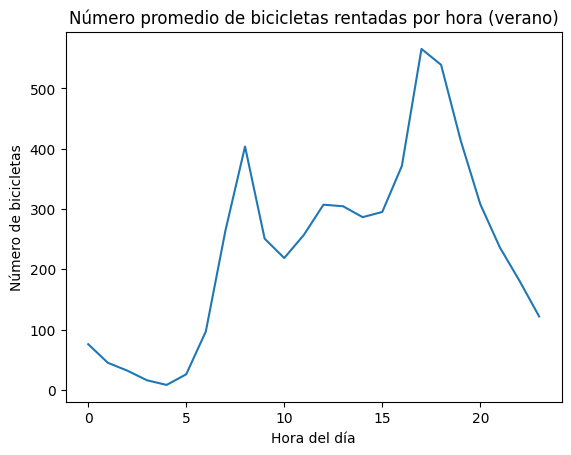

In [10]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
# Filtrar datos para verano (season = 3)
summer_data = bikes[bikes['season'] == 3]

# Calcular la media del total de viajes por hora en verano
summer_data.groupby('hour').total.mean().plot()

# Agregar título y etiquetas a los ejes
plt.title('Número promedio de bicicletas rentadas por hora (verano)')
plt.xlabel('Hora del día')
plt.ylabel('Número de bicicletas')

### Conclusiones:
- Mayor cantidad de viajes en verano: Se observa una mayor cantidad de viajes en bicicleta en todas las horas del día durante el verano en comparación con el invierno. La diferencia es más significativa durante la hora pico (entre las 16 y las 23 h), donde el número de viajes en bicicleta en verano es más del doble que en invierno.
- Patrón diario similar: El patrón diario de alquiler de bicicletas se mantiene similar en ambas estaciones, con un aumento gradual en la mañana, un pico en la tarde/noche y una disminución en la madrugada.
- Horas con mayor diferencia: Las horas con mayor diferencia en el número de viajes en bicicleta entre invierno y verano son las 17, 18 y 8.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [11]:
# Celda 3

# Seleccionar las variables "season", "hour" y "total"
X = bikes[['season', 'hour']]
X['season'] = X['season'].astype('category')

# Crear variables dummy para "season"
dummies = pd.get_dummies(X['season'], drop_first=True)
# Cambiar nombres de las variables dummies
nombres_columnas = ['season_2', 'season_3', 'season_4']
dummies.columns = nombres_columnas

# Agregar las variables dummy al conjunto de datos
X = X.join(dummies)
X = X.drop('season', axis=1)

y = bikes['total']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
model = LinearRegression().fit(X_train, y_train)

# Imprimir los coeficientes
print('Coeficientes:', model.coef_)



Coeficientes: [ 10.56961908  99.10667072 116.04634     84.944802  ]


### Interpretación de los coeficientes:
- Coeficiente de "hora": El coeficiente de "hora" es de 10.56961908. Esto significa que, por cada hora que aumenta, el número total de viajes en bicicleta aumenta en un promedio de 10.56961908 unidades.
- Coeficiente de "season_2": El coeficiente de "season_2" es de 99.10667072. Esto significa que, en promedio, el número total de viajes en bicicleta es 99.10667072 unidades mayor en la temporada 2 (primavera) que en la temporada 1 (invierno).
- Coeficiente de "season_3": El coeficiente de "season_3" es de 116.04634. Esto significa que, en promedio, el número total de viajes en bicicleta es 116.04634 unidades mayor en la temporada 3 (verano) que en la temporada 1 (invierno).
- Coeficiente de "season_4":El coeficiente de "season_4" es de 84.944802. Esto significa que, en promedio, el número total de viajes en bicicleta es 84.944802 unidades mayor en la temporada 4 (otoño) que en la temporada 1 (invierno).

En general, estos coeficientes indican que La hora del día tiene un impacto significativo en el número total de viajes en bicicleta, con un aumento en el número de viajes a lo largo del día y la temporada también tiene un impacto significativo en el número total de viajes en bicicleta, con la primavera, el verano y el otoño teniendo un mayor número de viajes que el invierno.

### ¿Cuáles son las limitaciones de la regresión lineal en este caso?
En el caso del análisis del número de viajes en bicicleta, las siguientes limitaciones pueden ser relevantes:
- La relación entre el número de viajes en bicicleta y la hora del día puede no ser lineal, especialmente durante las horas pico.
- La varianza del número de viajes en bicicleta puede ser mayor los fines de semana o en días festivos.
- Los residuos del modelo pueden no ser normales, especialmente si hay valores atípicos en el conjunto de datos.
- Es posible que se omitan variables importantes del modelo, como el clima, la accesibilidad a las ciclovías o la infraestructura ciclista.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [12]:
# Celda 4

# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

# Seleccionar las variables "season", "hour" y "total"
bikes_selec=bikes.reset_index()

X = bikes_selec[['season', 'hour']]
y = bikes_selec['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree



In [14]:
# Aplicación de la función tree_grow
tree = tree_grow(X_train, y_train, level=0, min_gain=0.001, max_depth=3, num_pct=10)
tree

{'y_pred': 1,
 'y_prob': 191.54087256027555,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 8708,
 'gain': 18456.395229132206,
 'sl': {'y_pred': 1,
  'y_prob': 54.53795264623955,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 2870,
  'gain': 6816.079714883683,
  'sl': {'y_pred': 1,
   'y_prob': 32.5818759936407,
   'level': 2,
   'split': [1, 6.0],
   'n_samples': 2514,
   'gain': 675.4884472669473,
   'sl': {'y_pred': 1,
    'y_prob': 25.071428571428573,
    'level': 3,
    'split': -1,
    'n_samples': 2154,
    'gain': 357.3111679859412},
   'sr': {'y_pred': 1,
    'y_prob': 77.1353591160221,
    'level': 3,
    'split': -1,
    'n_samples': 360,
    'gain': 669.3514908596662}},
  'sr': {'y_pred': 1,
   'y_prob': 208.54189944134077,
   'level': 2,
   'split': [0, 2.0],
   'n_samples': 356,
   'gain': 4261.797539269741,
   'sl': {'y_pred': 1,
    'y_prob': 125.66292134831461,
    'level': 3,
    'split': -1,
    'n_samples': 87,
    'gain': 0},
   'sr': {'y_pred': 1,
    'y_prob':

In [15]:
# Predicciones
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted


In [16]:
# Ejecución de función tree_predict
y_pred = tree_predict(X_test, tree)

# Cálculo del error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Impresión del MSE
print(f"Error cuadrático medio (MSE) arbol manual: {mse}")

Error cuadrático medio (MSE) arbol manual: 69309.25711662075


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

Text(0, 0.5, 'neg_mean_squared_error')

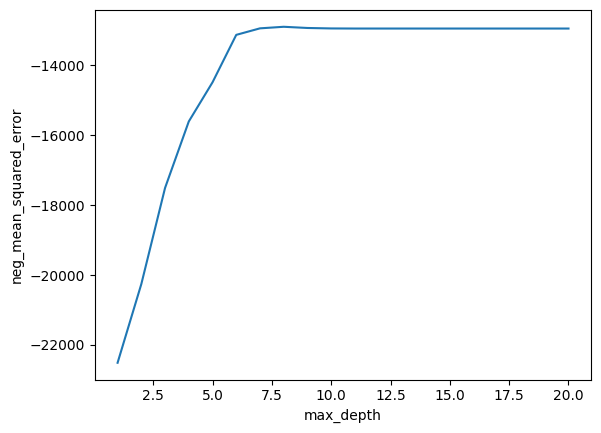

In [17]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)
# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeRegressor(max_depth=depth, random_state=123)
    scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean())

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, scores)
plt.xlabel('max_depth')
plt.ylabel('neg_mean_squared_error')


In [18]:
# Mejor parametro 
sorted(zip(scores, max_depth_range))[::-1][0]

(-12896.20444516455, 8)

In [19]:
# parámetros ajustados
model = DecisionTreeRegressor(max_depth=8, random_state=123)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=123)

In [20]:
# Uso de la función .feature_importances_ para obtener la importancia de cada variable
pd.DataFrame({'feature':X_train.columns, 'importance':model.feature_importances_}).sort_values('importance')

,feature,importance
0,season,0.135682
1,hour,0.864318


In [21]:
# Predicción en el conjunto de test
y_pred2 = model.predict(X_test)

# Cálculo del error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred2)

# Impresión del MSE
print(f"Error cuadrático medio (MSE) arbol libreria: {mse}")

Error cuadrático medio (MSE) arbol libreria: 13464.749112666655


### Comparación de resultados del árbol manual y el árbol de la libreria
- El error cuadrático medio (MSE) del árbol manual (69309.25711662075) es considerablemente mayor que el MSE del árbol de la biblioteca (13464.749112666655).
- El árbol de la libreria tiene un mejor rendimiento que el árbol manual, ya que su MSE es mucho menor. Esto significa que las predicciones del árbol de la liberia son más precisas que las del árbol manual.
- El árbol de la liberia fue ajustado con parámetros que lo ayudan a generalizar mejor a nuevos datos.


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [45]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [46]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [47]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

Text(0, 0.5, 'Accuracy')

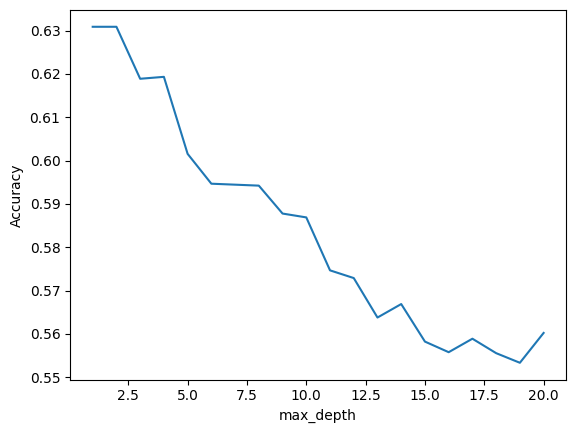

In [33]:
# Celda 6
# arbol de desicion
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [35]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6308888888888888, 2)

In [38]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)

# Evaluar el árbol de decisión
print("Accuracy del árbol de decisión:", clf.score(X_test, y_test))
print("F1-Score del árbol de decisión:", f1_score(y_test, clf.predict(X_test)))

Accuracy del árbol de decisión: 0.6453333333333333
F1-Score del árbol de decisión: 0.6448598130841121


In [40]:
# Crear un modelo de regresión logística
clf_logistic = LogisticRegression()
clf_logistic.fit(X_train, y_train)

# Evaluar el modelo de regresión logística
print("Accuracy de la regresión logística:", clf_logistic.score(X_test, y_test))
print("F1-Score de la regresión logística:", f1_score(y_test, clf_logistic.predict(X_test)))

Accuracy de la regresión logística: 0.6133333333333333
F1-Score de la regresión logística: 0.6102150537634409


### Análisis de los resultados
- Accuracy:
    - El árbol de decisión tiene una precisión del 64.53%, lo que significa que correctamente predice la popularidad de las noticias el 64.53% del tiempo.
    - La regresión logística tiene una precisión del 61.33%, lo que significa que correctamente predice la popularidad de las noticias el 61.33% del tiempo.
- F1-Score:
    - El árbol de decisión tiene un F1-Score de 0.6449, lo que indica un buen equilibrio entre la precisión y la exhaustividad.
    - La regresión logística tiene un F1-Score de 0.6102, que es ligeramente inferior al del árbol de decisión.
    
En este caso, el árbol de decisión tiene un mejor rendimiento que la regresión logística en términos de Accuracy y F1-Score. Esto puede deberse a que el árbol de decisión es capaz de capturar mejor las relaciones no lineales entre las características y la variable objetivo.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [67]:
# Celda 7
# Creación de 300 muestras de bootstrap
n_estimators = 300
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]
seeds = np.random.randint(1, 10000, size=n_estimators)


In [83]:
# Entrenamiento de 100 modelos arbol de decision con las 100 muestras boostrap max_depth
trees = {}
for i in range(100):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=5, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(100)))
for i in range(100):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

# Votación mayoritaria
y_pred_depth = (y_pred_df.sum(axis=1) >= (100 / 2)).astype(int)

# Desempeño al hacer votación mayoritaria
f1_score_tree_depth = metrics.f1_score(y_pred_depth, y_test)
# Desempeño al hacer votación mayoritaria
accuracy_tree_depth = metrics.accuracy_score(y_pred_depth, y_test)

print('f1_score arbol con depth = 5 :', f1_score_tree_depth)
print('accuracy arbol con depth = 5 :', accuracy_tree_depth)

f1_score arbol con depth = 5 : 0.6679973386560214
accuracy arbol con depth = 5 : 0.6673333333333333


In [112]:
# Entrenamiento de 100 modelos arbol de decision con las 100 muestras boostrap min_samples_leaf
trees = {}
for i in range(100,200):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", min_samples_leaf=0.1, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(100,200)))
for i in range(100):
    y_pred_df.iloc[:, i] = trees[i+100].predict(X_test)
# Votación mayoritaria
y_pred_leaf = (y_pred_df.sum(axis=1) >= (100 / 2)).astype(int)

# Desempeño al hacer votación mayoritaria
f1_score_tree_leaf = metrics.f1_score(y_pred_leaf, y_test)
# Desempeño al hacer votación mayoritaria
accuracy_tree_leaf = metrics.accuracy_score(y_pred_leaf, y_test)

print('f1_score arbol con min_samples_leaf = 0.1 :', f1_score_tree_leaf)
print('accuracy arbol con min_samples_leaf = 0,1 :', accuracy_tree_leaf)

f1_score arbol con min_samples_leaf = 0.1 : 0.6732026143790849
accuracy arbol con min_samples_leaf = 0,1 : 0.6666666666666666


In [113]:
# Entrenamiento de 100 modelos regresion logistica
trees = {}
for i in range(200,300):
    trees[i] = LogisticRegression(random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(200,300)))
for i in range(100):
    y_pred_df.iloc[:, i] = trees[i + 200].predict(X_test)

# Votación mayoritaria
y_pred_rl = (y_pred_df.sum(axis=1) >= (100 / 2)).astype(int)

# Desempeño al hacer votación mayoritaria
f1_score_tree_rl = metrics.f1_score(y_pred_rl, y_test)
# Desempeño al hacer votación mayoritaria
accuracy_tree_rl = metrics.accuracy_score(y_pred_rl, y_test)

print('f1_score arbol con regresion logistica:', f1_score_tree_rl)
print('accuracy arbol con regresion logistica:', accuracy_tree_rl)

f1_score arbol con regresion logistica: 0.6124661246612466
accuracy arbol con regresion logistica: 0.6186666666666667


In [135]:
# crear dataframe con las predicciones de los 3 algortimos por ensamble
data = {
    'depth': y_pred_depth,
    'leaf': y_pred_leaf,
    'rl': y_pred_rl 
}

votacion_final = pd.DataFrame(data)
print(votacion_final)


      depth  leaf  rl
1483      1     1   1
2185      1     1   1
2520      1     1   1
3721      1     1   1
3727      0     0   0
...     ...   ...  ..
3077      1     1   0
5166      0     0   0
2227      1     1   1
5684      0     0   0
1937      0     0   0

[1500 rows x 3 columns]


In [139]:
# Votación mayoritaria general de los 3 algoritmos
y_pred_final = (votacion_final.sum(axis=1) >= (3 / 2)).astype(int)
y_pred_final.head()

1483    1
2185    1
2520    1
3721    1
3727    0
dtype: int32

In [140]:
# Desempeño al hacer votación mayoritaria final
f1_score_final = metrics.f1_score(y_pred_rl, y_test)
# Desempeño al hacer votación mayoritaria
accuracy_final = metrics.accuracy_score(y_pred_rl, y_test)

print('f1_score del ensamble de los tres algoritmos :', f1_score_final)
print('accuracy del ensamble de los tres algoritmos :', accuracy_final)

f1_score del ensamble de los tres algoritmos : 0.6124661246612466
accuracy del ensamble de los tres algoritmos : 0.6186666666666667


### Análisis de los resultados
- Rendimiento individual de los modelos:
    - Árbol con profundidad 5: F1-score de 0.668 y precisión de 0.667.
    - Árbol con min_samples_leaf de 0.1: F1-score de 0.673 y precisión de 0.667.
    - Regresión logística: F1-score de 0.612 y precisión de 0.619.
    - Rendimiento del ensamble de los tres algoritmos: F1-score de 0.612 y precisión de 0.619.

- El árbol con profundidad 5 y el árbol con min_samples_leaf de 0.1 tienen un rendimiento similar en términos de F1-score y precisión.
- La regresión logística tiene un rendimiento inferior a los dos árboles.
- El ensamble de los tres algoritmos no mejora el rendimiento del mejor modelo individual (árbol con min_samples_leaf de 0.1)

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [142]:
# Celda 8

# Entrenamiento de 100 modelos arbol de decision con las 100 muestras boostrap max_depth
trees = {}
for i in range(100):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=5, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(100)))
for i in range(100):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

# Estimación de los errores OOB para cada clasificador
errors = np.zeros(100)

for i in range(100):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5, 1.0, 'OOB error of each tree max_depth')

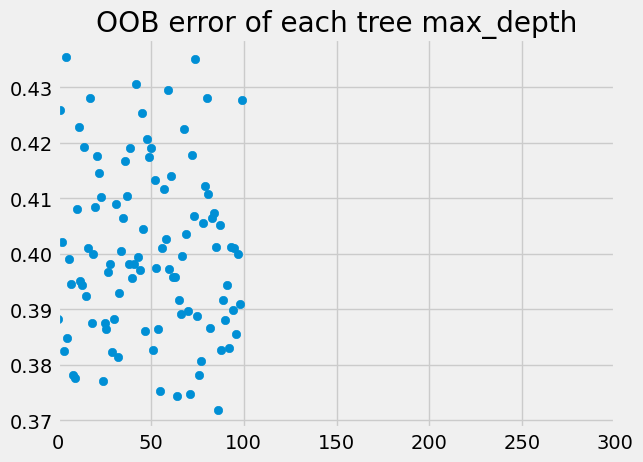

In [145]:
# Visualización de OOB para cada árbol
plt.style.use('fivethirtyeight')
plt.scatter(range(100), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree max_depth')

In [147]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(20)

# Desempeño al hacer votación ponderada
y_pred_depth = (weighted_sum_1 >= 0.5).astype(int)

# Desempeño al hacer votación mayoritaria
f1_score_tree_depth = metrics.f1_score(y_pred_depth, y_test)
# Desempeño al hacer votación mayoritaria
accuracy_tree_depth = metrics.accuracy_score(y_pred_depth, y_test)

print('f1_score arbol con depth = 5 :', f1_score_tree_depth)
print('accuracy arbol con depth = 5 :', accuracy_tree_depth)

f1_score arbol con depth = 5 : 0.6644429619746498
accuracy arbol con depth = 5 : 0.6646666666666666


In [159]:
# Entrenamiento de 100 modelos arbol de decision con las 100 muestras boostrap min_samples_leaf
trees = {}
for i in range(100,200):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", min_samples_leaf=0.1, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(100,200)))
for i in range(100):
    y_pred_df.iloc[:, i] = trees[i+100].predict(X_test)

samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

# Estimación de los errores OOB para cada clasificador
errors = np.zeros(100)

for i in range(100):
    y_pred_ = trees[i+100].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5, 1.0, 'OOB error of each tree min_samples_leaf')

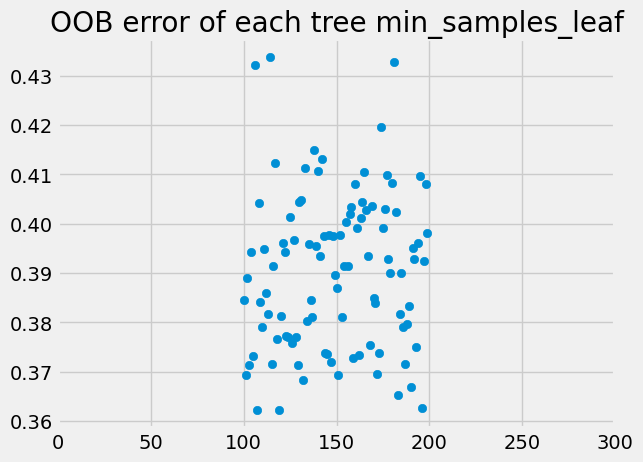

In [161]:
# Visualización de OOB para cada árbol
plt.style.use('fivethirtyeight')
plt.scatter(range(100,200), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree min_samples_leaf')

In [163]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(20)

# Desempeño al hacer votación ponderada
y_pred_leaf = (weighted_sum_1 >= 0.5).astype(int)

# Desempeño al hacer votación mayoritaria
f1_score_tree_leaf = metrics.f1_score(y_pred_leaf, y_test)
# Desempeño al hacer votación mayoritaria
accuracy_tree_leaf = metrics.accuracy_score(y_pred_leaf, y_test)

print('f1_score arbol con min_samples_leaf = 0.1 :', f1_score_tree_leaf)
print('accuracy arbol con min_samples_leaf = 0,1 :', accuracy_tree_leaf)

f1_score arbol con min_samples_leaf = 0.1 : 0.6714754098360656
accuracy arbol con min_samples_leaf = 0,1 : 0.666


In [166]:
# Entrenamiento de 100 modelos regresion logistica
trees = {}
for i in range(200,300):
    trees[i] = LogisticRegression(random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

# Predicción para los datos del set de test con cada modelo
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(200,300)))
for i in range(100):
    y_pred_df.iloc[:, i] = trees[i + 200].predict(X_test)

samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

# Estimación de los errores OOB para cada clasificador
errors = np.zeros(100)

for i in range(100):
    y_pred_ = trees[i + 200].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5, 1.0, 'OOB error of each tree max_depth')

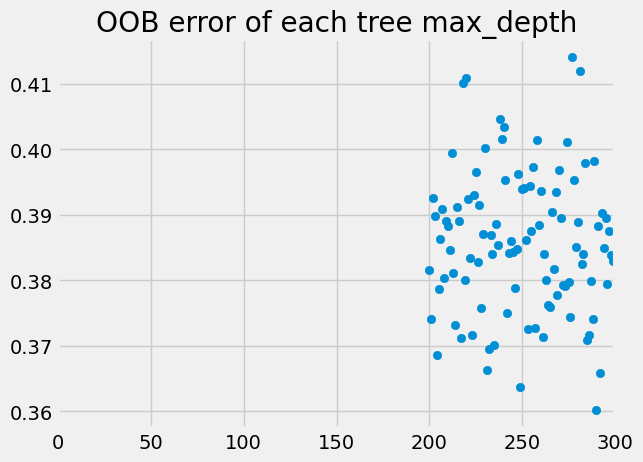

In [168]:
# Visualización de OOB para cada árbol
plt.style.use('fivethirtyeight')
plt.scatter(range(200,300), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree max_depth')

In [169]:
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors) / (1 - errors).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(20)

# Desempeño al hacer votación ponderada
y_pred_rl = (weighted_sum_1 >= 0.5).astype(int)

# Desempeño al hacer votación mayoritaria
f1_score_tree_rl = metrics.f1_score(y_pred_rl, y_test)
# Desempeño al hacer votación mayoritaria
accuracy_tree_rl = metrics.accuracy_score(y_pred_rl, y_test)

print('f1_score arbol con regresion logistica:', f1_score_tree_rl)
print('accuracy arbol con regresion logistica:', accuracy_tree_rl)

f1_score arbol con regresion logistica: 0.6105834464043419
accuracy arbol con regresion logistica: 0.6173333333333333


### Análisis del ensamble con votación ponderada
- Rendimiento individual de los modelos:
    - Árbol con profundidad 5: F1-score de 0.664 y precisión de 0.665.
    - Árbol con min_samples_leaf de 0.1: F1-score de 0.671 y precisión de 0.666.
    - Regresión logística: F1-score de 0.611 y precisión de 0.617.

- El árbol con min_samples_leaf de 0.1 tiene el mejor F1-score y la mejor precisión individual.
- La regresión logística tiene el rendimiento individual más bajo.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

### Análisis comparativo de los resultados: Votación mayoritaria vs. Votación ponderada
- Rendimiento individual de los modelos:
    - Árbol con profundidad 5:
        - F1-score: 0.668 (votación mayoritaria), 0.664 (votación ponderada)
        - Precisión: 0.667 (ambas)
    - Árbol con min_samples_leaf de 0.1:
        - F1-score: 0.673 (votación mayoritaria), 0.671 (votación ponderada)
        - Precisión: 0.667 (ambas)
    - Regresión logística:
        - F1-score: 0.612 (ambas)
        - Precisión: 0.619 (votación mayoritaria), 0.617 (votación ponderada)

- El árbol con min_samples_leaf de 0.1 tiene el mejor F1-score individual en ambas metodologías.
- La regresión logística tiene el rendimiento individual más bajo en ambas.

- Ventajas y desventajas:
    - Votación mayoritaria: Simple y fácil de implementar, No considera la confianza de las predicciones.
    - Votación ponderada: Puede tener un mejor rendimiento al considerar la confianza de las predicciones, Más compleja de implementar.